In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import folium

# Урок 4. Визуальный анализ данных. Практическая работа

## Задание 1

- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

### Задание 1.1

Скачать данные

In [2]:
df = pd.read_csv('kc_final.csv')
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Задание 1.2

Изучите стоимости недвижимости

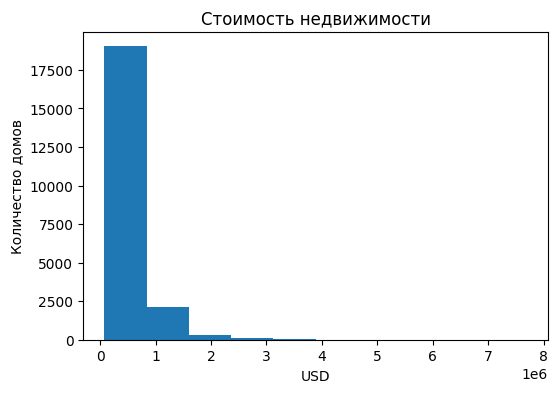

In [22]:
plt.figure(figsize=(6, 4))
plt.hist(x=df['price'])
plt.title('Стоимость недвижимости')
plt.xlabel('USD')
plt.ylabel('Количество домов');

Как видим из графика, стоимость подавляющего количества домов составляет меньше 1000000.

### Задание 1.3

Изучите распределение квадратуры жилой площади

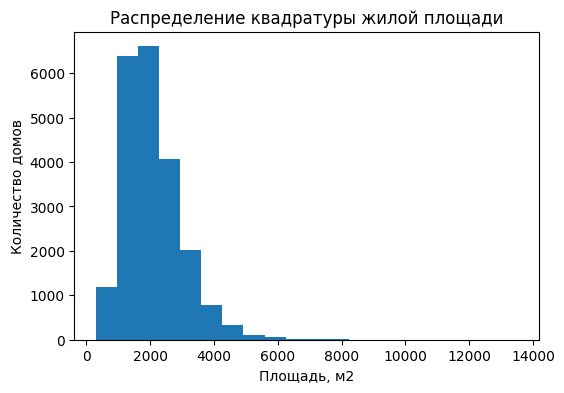

In [27]:
plt.figure(figsize=(6, 4))
plt.hist(x=df['sqft_living'], bins=20)
plt.title('Распределение квадратуры жилой площади')
plt.xlabel('Площадь, м2')
plt.ylabel('Количество домов');

Жилая площадь большинства домов составляет от 1000 до 3000 м2.

### Задание 1.4

Изучите распределение года постройки

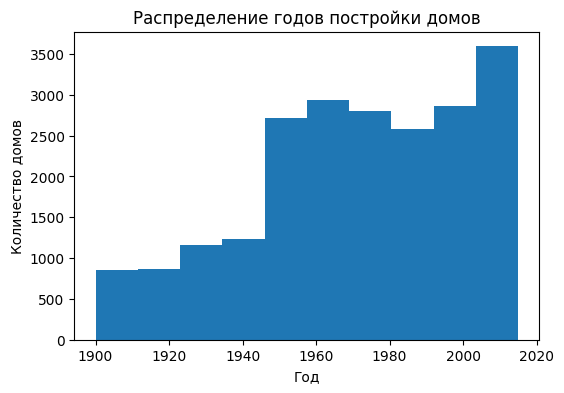

In [29]:
plt.figure(figsize=(6, 4))
plt.hist(x=df['yr_built'])
plt.title('Распределение годов постройки домов')
plt.xlabel('Год')
plt.ylabel('Количество домов');

Большая часть домов была построена после 1950 года.

## Задание 2

### Задание 2.1

- Изучите распределение домов от наличия вида на набережную
- Постройте график
- Сделайте выводы

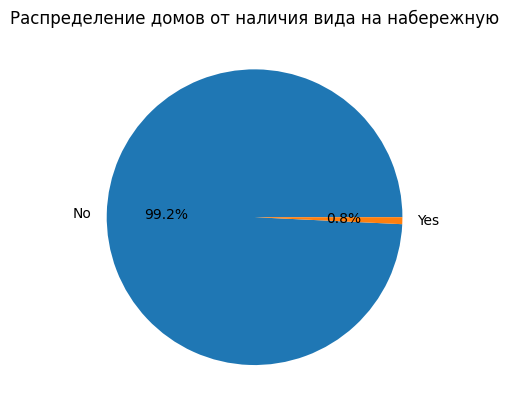

In [52]:
data = df['waterfront'].value_counts()
names = ['No', 'Yes']
values = data.values
plt.title('Распределение домов от наличия вида на набережную')
plt.pie(values, autopct='%.1f%%', labels=names);

Лишь 0,8% от всего количества домов имеют вид на набережную.

### Задание 2.2

Изучите распределение этажей домов

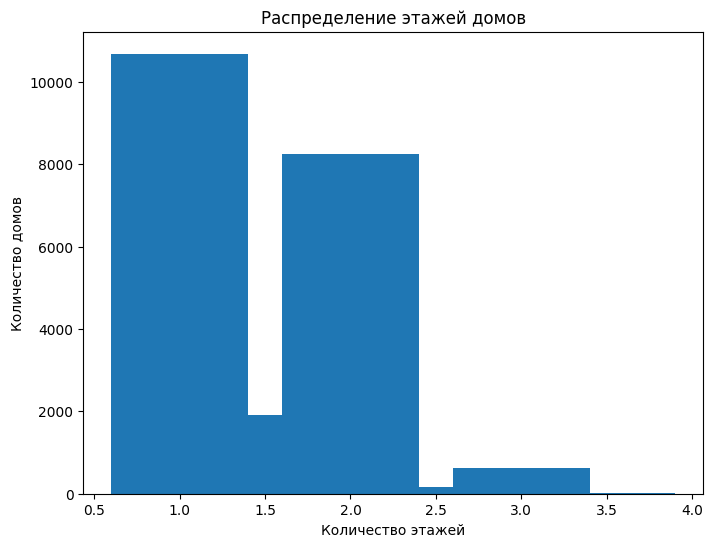

In [53]:
floors = df['floors'].value_counts()
count_floors = floors.index
count_houses_f = floors.values

plt.figure(figsize=(8, 6))
plt.bar(count_floors, count_houses_f)
plt.title('Распределение этажей домов')
plt.xlabel('Количество этажей')
plt.ylabel('Количество домов');

Чаще всего встречаются дома с 1 или 2 этажами.

### Задание 2.3

Изучите распределение состояния домов

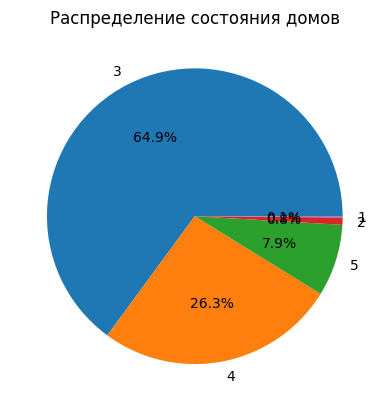

In [54]:
condition = df['condition'].value_counts()
condition_score = condition.index
condition_score_count = condition.values
plt.pie(condition_score_count, autopct='%.1f%%', labels=condition_score)
plt.title('Распределение состояния домов');

64.5% домов имеют среднюю оценку 3. Также значительная часть домов - 26.3% - имеют оценку состояния 4.

## Задание 3

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

### Решение

Посмотрим всю матрицу корреляций нашего датафрейма, построив тепловую карту из seaborn.

C:\Users\Nataliya\AppData\Local\Temp\ipykernel_4024\920518337.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


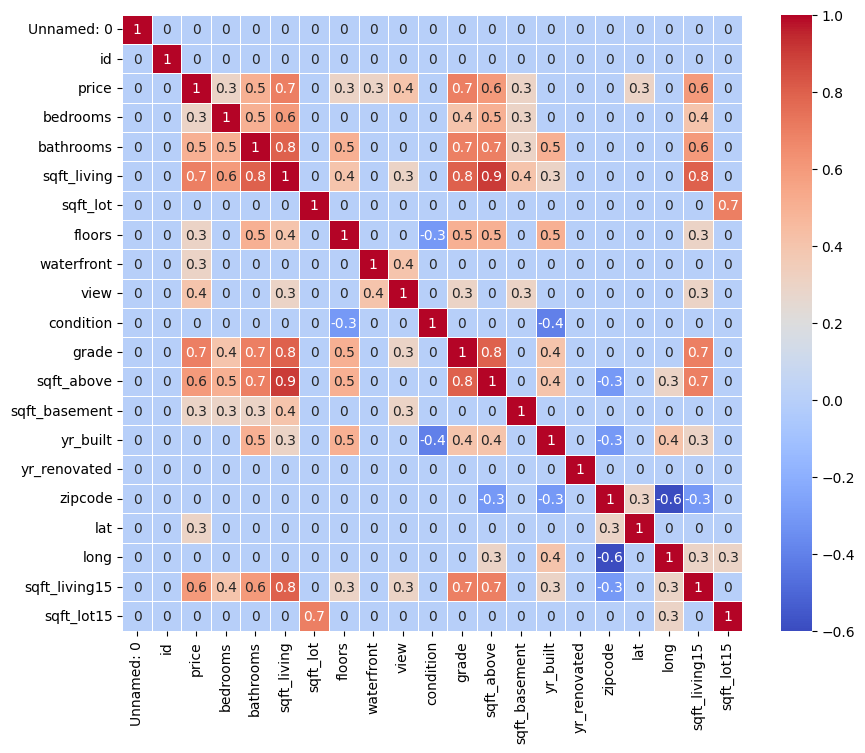

In [98]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix)<0.3] = 0

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm');


Таким образом, наблюдаем:

сильную прямую взаимосвязь между ценой и:

- жилой площадью
- оценкой дома grade

среднюю прямую взаимосвязь между ценой и:

- количеством ванных комнат
- количеством спален
- количеством этажей
- расположением дома на побережье
- видом

Проанализируем зависимость цены домов от их оценки grade:

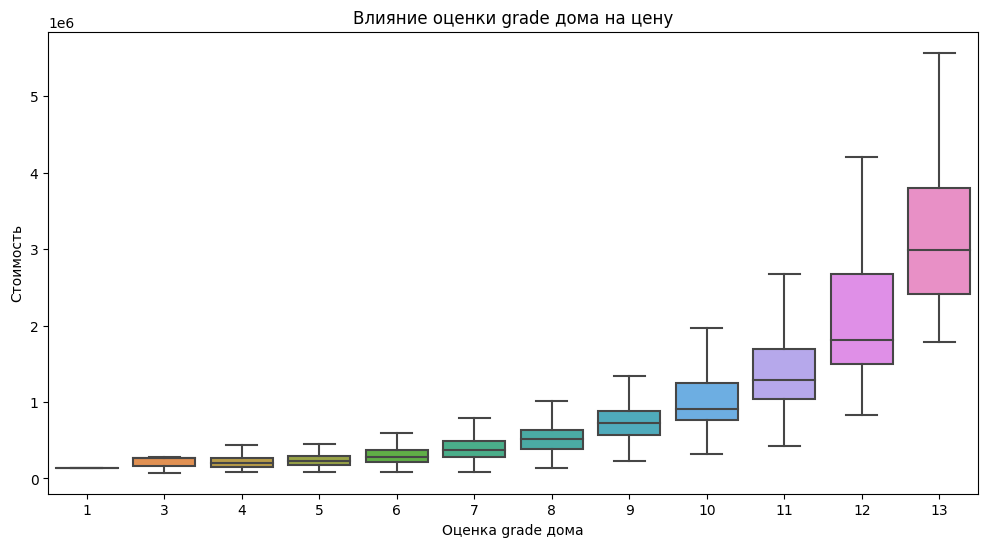

In [104]:
plt.figure(figsize=(12,6))

sns.boxplot(y=df['price'], x=df['grade'], showfliers=False)

plt.xlabel('Оценка grade дома')
plt.ylabel('Стоимость')
plt.title('Влияние оценки grade дома на цену');


Действительно, есть сильная прямая зависимость цены дома от его оценки grade:

с ростом оценки заметно увеличивается и цена на дом, особенно выше оценки grade 6.

Теперь детальнее посмотрим на зависимость цены на дом от величины жилой площади:

<Figure size 800x800 with 0 Axes>

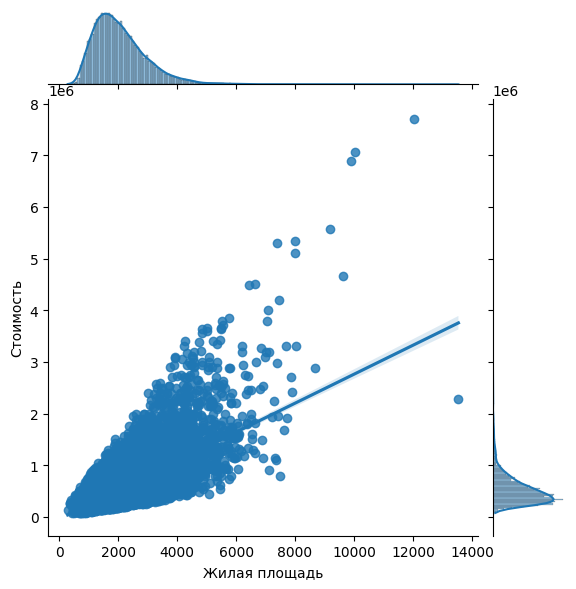

In [114]:
plt.figure(figsize=(8,8))
sns.jointplot(x=df['sqft_living'], y=df['price'], kind='reg')
plt.xlabel('Жилая площадь')
plt.ylabel('Стоимость')
plt.title('Зависимость цены дома от жилой площади');

Посмотрим, как зависит цена дома от его расположения:

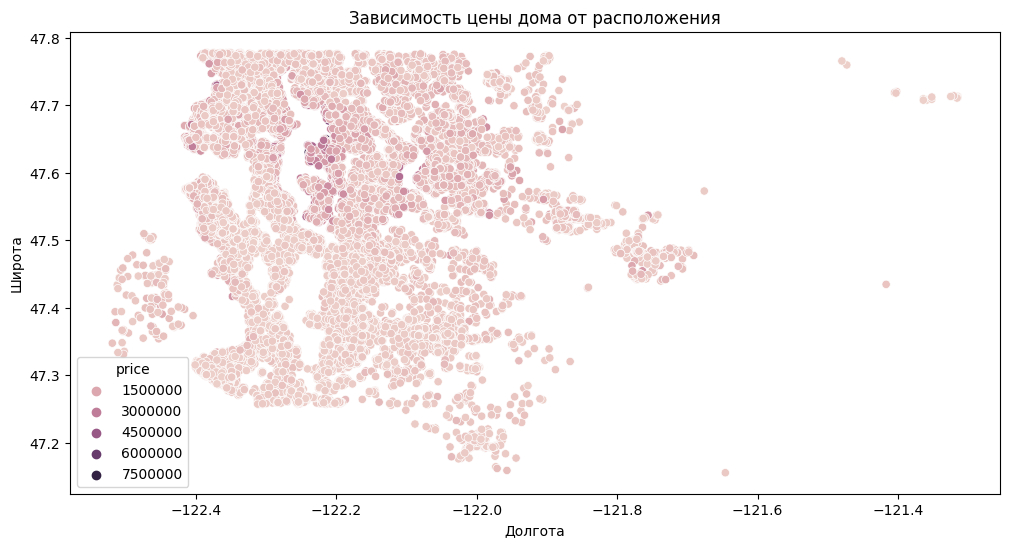

In [128]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='long', y='lat', hue='price')
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.title('Зависимость цены дома от расположения');

Отобразим наши дома на интерактивной карте и посмотрим, где они расположены:

In [ ]:
this_map = folium.Map(prefer_canvas=True)

def plotDot(point):
    folium.CircleMarker(
        location=[point.lat, point.long],
        radius=2,
        popup=point.price
    ).add_to(this_map)

df.apply(plotDot, axis=1)
this_map.fit_bounds(this_map.get_bounds())
this_map

Здесь при запуске будет интерактивная карта. Из-за большого объема вывод ячейки очистила, т.к. Github тогда файл не открывает.